In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


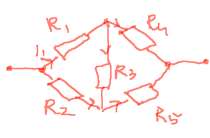

In [4]:
from pulp import *
#print(pulp.__version__)

U = [6,10,4,7,3]

prob = LpProblem("Minimalizacja_mocy_na_rezo",LpMinimize)

i1=LpVariable("i1",0,None,LpContinuous)
i2=LpVariable("i2",0,None,LpContinuous)
i3=LpVariable("i3",0,None,LpContinuous)
i4=LpVariable("i4",0,None,LpContinuous)
i5=LpVariable("i5",0,None,LpContinuous)

prob += 6*i1 + 10*i2 + 4*i3 + 7*i4 + 3*i5

#kirchhoff
prob += i1+i2 == i4+i5
prob += i1 == i3+i4
prob += i2 == i5-i3

#ograniczenia pradów
prob += i1 >= 3
prob += i1 <= 5
prob += i2 >= 1
prob += i2 <= 3
prob += i3 >= 1
prob += i3 <= 3
prob += i4 >= 1
prob += i4 <= 3
prob += i5 >= 3
prob += i5 <= 5

prob.writeLP("rezo.lp")
prob.solve()

varsdict = {}

j = 0
for v in prob.variables():
    varsdict[v.name,"R"+str(j+1)] = str(v.varValue), U[j]/v.varValue
    j += 1

#!cat "rezo.lp"

print("Status:", LpStatus[prob.status])
print("Minimalna moc {}W, prądy [A] i rezo [Ω]: {}".format(value(prob.objective),varsdict))

Status: Optimal
Minimalna moc 52.0W, prądy [A] i rezo [Ω]: {('i1', 'R1'): ('3.0', 2.0), ('i2', 'R2'): ('1.0', 10.0), ('i3', 'R3'): ('2.0', 2.0), ('i4', 'R4'): ('1.0', 7.0), ('i5', 'R5'): ('3.0', 1.0)}
